In [29]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分三类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
# display(feature)
num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
    print('y_predict', y_pre)
    print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
        else:
            print('the predict is ',y_pre[i],', but the true is ',y_test[i])
    print('测试集大小', len(y_test))
    print('预测正确个数', sum)
    print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
    print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)



flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.004125400000020818
y_predict [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.
  0.  0. -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  0.  0. -1.  0.  1.  1.  1. -1. -1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.
 -1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.
  1. -1.  1.  1. -1.  1.  0.  0. -1.  1.  1.  1.  0.]
y_true [ 0.  0. -1.  0.  1.  1.  0.  0.  1. -1.  0.  0.  1.  0.  1.  1.  0.  0.
  0.  1. -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0. -1. -1.  0.  1.  1.  1. -1. -1.  1.  1.  0.  0.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.
 -1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
  1. -1.  1.  1. -1.  1.  0.  0. -1.  1.  1.  1.  1.]
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the tru

the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
测试集大小 103
预测正确个数 94
epoch[ 18 ]  0.912621359223301

Training begin...
Training finish
Train Time:  0.002868399999954363
y_predict [ 0.  0. -1.  1.  1. -1.  0. -1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0. -1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0. -1.  1. -1.  1. -1.  0.  1.
  0.  0.  0.  0.  1.  0. -1.  0.  1.  1.  0.  0. -1.  0.  0.  0.  0.  1.
  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.
  0.  1. -1. -1. -1.  0.  0.  0.  1. -1.  1.  0.  1.]
y_true [ 0.  0. -1.  1.  1. -1.  0. -1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.
  1.  0.  0. -1.  1.  0.  1.  1. -1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  0.  1. -1.  1.  0.  0. -1.  1.  1.  0.  0. -1.  1. -1.  1. -1. -1.  1.
  0. -1.  0.  0.  1.  0. -1.  1.  1.  1. -1.  0. -1.  0.  0.  0.  0.  1.
  0.  1.  1.  1.  0. -

the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
测试集大小 103
预测正确个数 88
epoch[ 32 ]  0.8543689320388349

Training begin...
Training finish
Train Time:  0.0032019999999874926
y_predict [ 1.  0.  0. -1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.
  1.  0.  0.  1.  1.  1. -1. -1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0. -1.  1.
  0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.
  0.  1.  0.  1.  1.  1. -1. -1.  1.  1.  0. -1. -1.]
y_true [ 1. -1.  1. -1.  1. -1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.
  1.  0.  0.  0.  1.  1. -1. -1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1. -1.  0

Training finish
Train Time:  0.004202599999985068
y_predict [ 0.  1.  1. -1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1. -1.  1.  1.  0.  1.  0.
  1.  0.  0. -1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  0.  1. -1.  1.  0.  1.  0.  0.  0.  1.  0.
  0.  1.  0.  1.  1.  0.  0. -1.  1. -1.  1.  1.  1.]
y_true [ 0.  1.  0. -1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0. -1.  1.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1. -1.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  0.  1. -1.  1.  0.  1.  0.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  0. -1.  1. -1.  1.  1.  1.]
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predi

the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  -1.0
the predict is  -1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  -1.0
测试集大小 103
预测正确个数 86
epoch[ 53 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.0033640999999988708
y_predict [-1.  1.  1.  0.  0.  0.  0. -1. -1.  1.  1.  1.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  0.  0.  1.  0.  0. -1. -1.  1.  0.  1.  0.  0.  1.  1. -1.
  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1. -1. -1.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.
  0. -1.  1.  1.  1. -1.  1.  0.  1.  0.  1.  1. -1.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  0.]
y_true [ 0.  0.  1.  0.  0.  0.  1. -1. -1.  1.  1.  1.  0.  1.  1.  0.  1.  1.
  1.  0.  1.  0.  0.  

Training finish
Train Time:  0.004093699999998535
y_predict [-1.  0.  0.  1.  1. -1.  0.  0.  1.  1.  1.  0.  1.  0.  0. -1.  1. -1.
 -1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1. -1.  0.
  0.  0. -1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.
  1.  1. -1.  1.  0.  0.  1.  1.  1. -1.  0. -1.  1.  1. -1.  0.  0.  0.
  1.  1. -1.  1.  0.  1. -1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.]
y_true [-1.  1.  0.  1.  1. -1.  0. -1.  0.  1.  1.  0.  1.  0.  0. -1.  1.  0.
 -1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1. -1.  0.
  0. -1. -1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.
  1.  1. -1.  1.  0.  0.  1.  1.  1. -1.  0. -1.  1.  1. -1.  0.  0.  0.
  1.  1. -1.  1.  0.  1. -1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.]
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the pred

the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predict is  -1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  -1.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
测试集大小 103
预测正确个数 86
epoch[ 75 ]  0.8349514563106796

Training begin...
Training finish
Train Time:  0.004060200000026271
y_predict [ 0.  1.  0. -1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  0. -1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.
 -1.  0.  0.  1.  0.  1.  1.  0. -1.  0.  0.  1.  1.  1. -1.  0.  1.  1.
  1.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1. -1.  0.  1.  0.
  0.  0.  1.  1.  1.  1.  1.

Training finish
Train Time:  0.00336710000004814
y_predict [ 1.  0.  0.  1.  1.  1.  1.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  1.  1.  0.  0. -1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  1.  0.  1. -1.  1. -1.  1.  0.  1.  1.  1.  0.  0. -1.  0.  1.
  1.  1.  0.  0. -1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.
  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1. -1.  0.  0.  1.  0.  0.
  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.]
y_true [ 1.  0.  0.  1.  0.  1.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1. -1.
  1.  0.  1.  1.  0.  0. -1.  1.  1.  1.  1.  0.  1.  0.  1. -1.  0.  1.
  0.  0.  1.  0.  0. -1.  1. -1.  0.  0.  1.  1.  1.  0.  0. -1. -1.  1.
  1.  1.  0.  0. -1. -1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.
  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1. -1.  0.  0.  1.  0.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
the predict is  1.0 , but the true is  0.0
the predict is  1.0 , but the true is  0.0
the predic

In [2]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')

feature=feature.iloc[:, 2:9]
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())

# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
#     print('y_predict', y_pre)
#     print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
#         else:
#             print('the predict is ',y_pre[i],', but the true is ',y_test[i])
#     print('测试集大小', len(y_test))
#     print('预测正确个数', sum)
#     print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.003103500000001702
Training begin...
Training finish
Train Time:  0.0025029999999972574
Training begin...
Training finish
Train Time:  0.003804699999999883
Training begin...
Training finish
Train Time:  0.0024762000000002615
Training begin...
Training finish
Train Time:  0.0022466999999970483
Training begin...
Training finish
Train Time:  0.00289189999999806
Training begin...
Training finish
Train Time:  0.0029591999999993845
Training begin...
Training finish
Train Time:  0.0021473000000007403
Training begin...
Training finish
Train Time:  0.0028031000000012796
Training begin...
Training finish
Train Time:  0.0021215000000012196
Training begin...
Training finish
Train Time:  0.0020500000000005514
Training begin...
Training finish
Train Time:  0.0025940999999995995
Training begin...
Training finish
Train Time:  0.001792199999997024
Training begin...
Training finish
Train Time:  0.0028907000000018
Training begin...
Training finish
Train Ti

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.002635499999996682
所用核为： linear
准确率： 0.9029126213592233
报告               precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.89      0.93      0.91        55

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103

auc 0.9704545454545455
支持向量的权重: [[ 0.2048039   3.13963373  2.33204392  5.30648431  0.80758981 -0.22867407]]


<Figure size 432x288 with 0 Axes>

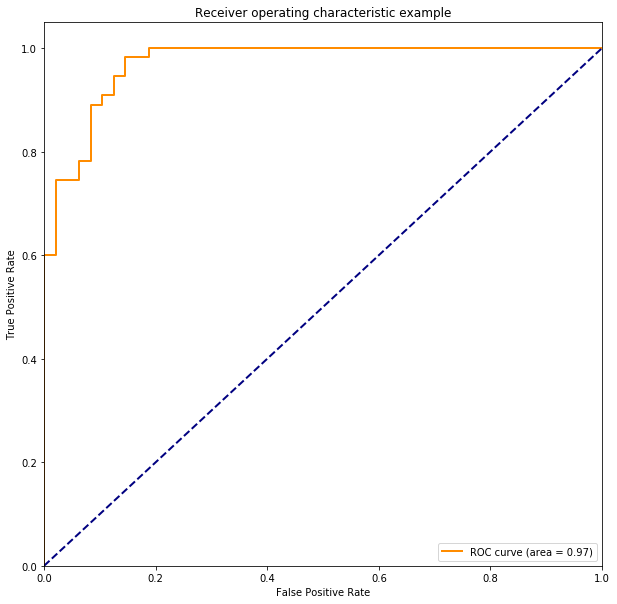

In [7]:
%matplotlib inline
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time
import matplotlib.pyplot as plt

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())
feature=feature.iloc[:, 2:9]
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)

Kernel='linear'

# 划分训练集测试集
X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=1)   
# 搭建svm模型
svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                max_iter=-1, decision_function_shape=None,random_state=None)
# 训练模型
print('Training begin...')
start=time.clock()

y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)
end=time.clock()
print('Training finish')
print('Train Time: ',end-start)

# 测试模型
y_pre = svm_clf.predict(X_test)
#     print('y_predict', y_pre)
#     print('y_true', y_test)
# 计算准确率

fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

target=['0','1']
print('所用核为：',Kernel)
print('准确率：',accuracy_score(y_test,y_pre))
print('报告',classification_report(y_test,y_pre,target_names=target))
print('auc',roc_auc)


# print("支持向量指数:",svm_clf.support_)
# print("支持向量",svm_clf.support_vectors_)
# print("每一类的支持向量个数",svm_clf.n_support_)
# print("支持向量的系数:",svm_clf.dual_coef_)
print("支持向量的权重:",svm_clf.coef_)
# print("截距:",svm_clf.intercept_)


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [44]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分三类
# display(feature)     

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train) 
#     特征重要性
    importance+=clf.feature_importances_
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1

    print('预测正确个数', sum)

    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('特征重要性：',importance/epoch)        
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0027121999999053514
预测正确个数 89
Training begin...
Training finish
Train Time:  0.0029640000000199507
预测正确个数 91
Training begin...
Training finish
Train Time:  0.006024900000056732
预测正确个数 91
Training begin...
Training finish
Train Time:  0.0029042999999546737
预测正确个数 89
Training begin...
Training finish
Train Time:  0.002175300000089919
预测正确个数 87
Training begin...
Training finish
Train Time:  0.0038220999999794003
预测正确个数 87
Training begin...
Training finish
Train Time:  0.003346899999996822
预测正确个数 89
Training begin...
Training finish
Train Time:  0.003956000000016502
预测正确个数 93
Training begin...
Training finish
Train Time:  0.002963099999988117
预测正确个数 90
Training begin...
Training finish
Train Time:  0.0029289999999946303
预测正确个数 89
Training begin...
Training finish
Train Time:  0.0028585000000020955
预测正确个数 86
Training begin...
Training finish
Train Time:  0.003455900000062684
预测正确个数 90
Training begin...
Training finish
Train Time:  0.002296099

In [45]:
# 决策树
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time


# 读取数据
feature=pd.read_csv(r'../data/ml_danmu_frag.csv')
feature=feature.iloc[:, 2:9]
# display(feature)
# 归一化
# feature['num']=(feature['num']-feature['num'].min())/(feature['num'].max()-feature['num'].min())
# 标准化
feature['num']=(feature['num']-feature['num'].mean())/(feature['num'].std())

# 分两类
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
importance=np.array([0.,0.,0.,0.,0.,0.])
# importance=np.array([0.,0.,0.,0.,0.])

for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:7], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    clf = tree.DecisionTreeClassifier(criterion='entropy')  
    # 训练模型
    print('Training begin...')
    start=time.clock()
    clf.fit(X_train, y_train) 
#     特征重要性
    importance+=clf.feature_importances_
#     print(clf.feature_importances_)  
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = clf.predict(X_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1

    print('预测正确个数', sum)

    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('特征重要性：',importance/epoch)        
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
0.0    258
1.0    256
dtype: int64

Training begin...
Training finish
Train Time:  0.0024444999999104766
预测正确个数 92
Training begin...
Training finish
Train Time:  0.0021497000000181288
预测正确个数 94
Training begin...
Training finish
Train Time:  0.00246789999982866
预测正确个数 94
Training begin...
Training finish
Train Time:  0.0019973000000845786
预测正确个数 97
Training begin...
Training finish
Train Time:  0.002158800000188421
预测正确个数 91
Training begin...
Training finish
Train Time:  0.002530399999841393
预测正确个数 89
Training begin...
Training finish
Train Time:  0.001915300000064235
预测正确个数 93
Training begin...
Training finish
Train Time:  0.0024090999997952167
预测正确个数 96
Training begin...
Training finish
Train Time:  0.002000300000190691
预测正确个数 95
Training begin...
Training finish
Train Time:  0.0017299999999522697
预测正确个数 95
Training begin...
Training finish
Train Time:  0.0017299999999522697
预测正确个数 88
Training begin...
Training finish
Train Time:  0.002671599999985119
预测正确个数 94
Training begin...
Training finish
Train Time:  0.0020426999

In [20]:
# 合并数据(赛事房间+直播房间)
import pandas as pd
data1=pd.read_csv(r'../data/room36252/new_flagfeature_final_room36252danmu0318.csv')
data2=pd.read_csv(r'../data/room911/feature_final_room911danmu0206.csv')
# display(data1)
# display(data2)
dele1=[]
dele2=[]
dele=[]
for index,row in data1.iterrows():
    if row['uncertain']==2:
        dele1.append(index)
data1.drop(index=dele1,inplace=True)

for index,row in data2.iterrows():
    if row['uncertain']==2:
        dele2.append(index)
data2.drop(index=dele2,inplace=True)

data1.dropna(subset=['flag'],inplace=True)
data2.dropna(subset=['flag'],inplace=True)
# display(data1)
# display(data2)
group1=data1.groupby('flag')
group2=data2.groupby('flag')
display(group1.size(),group2.size())
new_data=data1.append(data2)
group=new_data.groupby('flag')
display(group.size())
# display(new_data)
new_data.to_csv(r'../data/ml_danmu_frag.csv',index=None)


flag
-1     50
 0    153
 1    168
dtype: int64

flag
-1.0     4
 0.0    51
 1.0    88
dtype: int64

flag
-1.0     54
 0.0    204
 1.0    256
dtype: int64